# Assignment: Customer Data Pre-processing

## Module: Introduction to Programming for Artificial Intelligence and Data Science (771768)

### Overview

This notebook processes customer data from a CSV file (acw_user_data.csv) into structured JSON formats, performs data cleaning, derives new metrics, and generates visualizations using Pandas and Seaborn. 

In [3]:
# Import standard libraries for data processing
import csv
import json
import os
from datetime import datetime

## A) Data Processing Tasks
### Task 1: Read the CSV File
We will read the provided acw_user_data.csv file using the csv library and store the data as a list of dictionaries for further processing.

In [4]:
def read_csv_file(file_path):
    """
    Reads a CSV file and returns a list of dictionaries.
    
    Args:
        file_path (str): Path to the CSV file.
    
    Returns:
        list: List of dictionaries, each representing a row.
    """
    data = []
    try:
        with open(file_path, mode='r', encoding='utf-8') as file:
            csv_reader = csv.DictReader(file)
            for row in csv_reader:
                data.append(dict(row))
        print(f"Successfully read {len(data)} records from {file_path}")
        return data
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return []
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return []

# Read the CSV file
csv_file_path = 'acw_user_data.csv'
customer_data = read_csv_file(csv_file_path)

Successfully read 1000 records from acw_user_data.csv


### Task 2: Convert Flat  Structure to Nested Structures



In [6]:
def convert_to_nested_structure(data):
    """
    Converts flat CSV data into nested structures for Vehicle, Credit Card, and Address.
    
    Args:
        data (list): List of dictionaries from CSV.
    
    Returns:
        list: List of dictionaries with nested structures.
    """
    nested_data = []
    for row in data:
        # Initialize nested dictionary for each person
        person = {}
        
        # Direct attributes with type casting
        person['first_name'] = row.get('First Name', '').strip()
        person['last_name'] = row.get('Second Name', '').strip()
        person['age'] = int(row.get('Age (Years)', 0)) if row.get('Age (Years)', '').strip().isdigit() else 0
        person['sex'] = row.get('Sex', '').strip()
        person['retired'] = row.get('Retired', '').lower() == 'true'
        person['marital_status'] = row.get('Marital Status', '').strip()
        person['dependants'] = row.get('Dependants', '').strip()
        person['salary'] = float(row.get('Yearly Salary', 0)) if row.get('Yearly Salary', '').strip().replace('.', '').isdigit() else 0.0
        person['pension'] = float(row.get('Yearly Pension', 0)) if row.get('Yearly Pension', '').strip().replace('.', '').isdigit() else 0.0
        person['employer'] = row.get('Employer Company', '').strip()
        person['distance_commuted'] = float(row.get('Distance Commuted to Work (miles)', 0)) if row.get('Distance Commuted to Work (miles)', '').strip().replace('.', '').isdigit() else 0.0
        
        # Nested Vehicle structure
        person['vehicle'] = {
            'make': row.get('Vehicle Make', '').strip(),
            'model': row.get('Vehicle Model', '').strip(),
            'year': int(row.get('Vehicle Year', 0)) if row.get('Vehicle Year', '').strip().isdigit() else 0,
            'type': row.get('Vehicle Type', '').strip()
        }
        
        # Nested Credit Card structure
        person['credit_card'] = {
            'number': row.get('Credit Card Number', '').strip(),
            'start_date': row.get('Credit Card Start Date', '').strip(),
            'end_date': row.get('Credit Card End Date', '').strip(),
            'security_code': row.get('Credit Card Security Code', '').strip(),
            'iban': row.get('IBAN', '').strip()
        }
        
        # Nested Address structure
        person['address'] = {
            'main_address': row.get('Address Street', '').strip(),
            'city': row.get('Address City', '').strip(),
            'postcode': row.get('Address Postcode', '').strip()
        }
        
        nested_data.append(person)
    
    return nested_data

# Convert data to nested structure
nested_customer_data = convert_to_nested_structure(customer_data)

### Task 3 : Handle Errors in Dependant Column

In [8]:
def fix_dependants(data):
    """
    Fixes empty or invalid dependants entries and reports problematic rows.
    
    Args:
        data (list): List of dictionaries with nested structures.
    
    Returns:
        list: Updated data with corrected dependants.
        list: Indices of problematic rows.
    """
    problematic_rows = []
    for idx, person in enumerate(data):
        dependants = person['dependants']
        if not dependants or dependants.strip() == '' or not dependants.isdigit():
            problematic_rows.append(idx)
            person['dependants'] = 0  # Default to 0 for invalid/empty entries
        else:
            person['dependants'] = int(dependants)  # Ensure integer type
    
    print(f"Problematic rows for dependants: {problematic_rows}")
    return data, problematic_rows

# Fix dependants and get problematic rows
nested_customer_data, problematic_rows = fix_dependants(nested_customer_data)

Problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


### Task 4: Write to processed.json

In [9]:
def write_json_file(data, output_file):
    """
    Writes data to a JSON file.
    
    Args:
        data (list): Data to write.
        output_file (str): Path to output JSON file.
    """
    try:
        with open(output_file, 'w', encoding='utf-8') as f:
            json.dump(data, f, indent=4)
        print(f"Successfully wrote data to {output_file}")
    except Exception as e:
        print(f"Error writing to {output_file}: {e}")

# Write to processed.json
write_json_file(nested_customer_data, 'processed.json')

Successfully wrote data to processed.json


### Task 5: Create retired.json and employed.json

In [10]:
def filter_and_write_json(data, output_file, condition):
    """
    Filters data based on a condition and writes to a JSON file.
    
    Args:
        data (list): Input data.
        output_file (str): Path to output JSON file.
        condition (callable): Function to filter data.
    """
    filtered_data = [person for person in data if condition(person)]
    write_json_file(filtered_data, output_file)
    print(f"Wrote {len(filtered_data)} records to {output_file}")

# Filter retired customers
filter_and_write_json(nested_customer_data, 'retired.json', lambda x: x['retired']) 

# Filter employed customers (non-empty employer field)
filter_and_write_json(nested_customer_data, 'employed.json', lambda x: x['employer'] != '')

Successfully wrote data to retired.json
Wrote 246 records to retired.json
Successfully wrote data to employed.json
Wrote 1000 records to employed.json


### Task 6: Identiy invalid Credit Card Entries

In [11]:
def is_invalid_credit_card(row):
    """
    Checks if the credit card duration exceeds 10 years.
    
    Args:
        row (dict): A person's data dictionary.
    
    Returns:
        bool: True if the credit card duration exceeds 10 years, False otherwise.
    """
    try:
        start_date = datetime.strptime(row['credit_card']['start_date'], '%m/%y')
        end_date = datetime.strptime(row['credit_card']['end_date'], '%m/%y')
        delta_years = (end_date - start_date).days / 365.25
        return delta_years > 10
    except (ValueError, KeyError):
        return False  # Return False if dates are invalid or missing

# Filter and write invalid credit card records
filter_and_write_json(nested_customer_data, 'remove_ccard.json', is_invalid_credit_card)

Successfully wrote data to remove_ccard.json
Wrote 0 records to remove_ccard.json


### Task 7: Calculate Salary-commmute and sort

In [12]:
def calculate_salary_commute():
    """
    Reads processed.json, calculates Salary-Commute, sorts, and writes to commute.json.
    """
    try:
        with open('processed.json', 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        for person in data:
            commute = person['distance_commuted']
            salary = person['salary']
            # Calculate Salary-Commute: salary per km, or salary if commute <= 1
            person['salary_commute'] = salary if commute <= 1 else salary / commute if commute > 0 else 0
        
        # Sort by salary_commute in ascending order
        sorted_data = sorted(data, key=lambda x: x['salary_commute'])
        
        # Write to commute.json
        write_json_file(sorted_data, 'commute.json')
    except Exception as e:
        print(f"Error processing commute data: {e}")

# Calculate and write Salary-Commute
calculate_salary_commute()

Successfully wrote data to commute.json


# B Data Visualization Task
Using  Pandas and Seaborn to generate visualizations based on the original CSV file


In [17]:
# Import libraries for visualization (used only in Data Visualisation section)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Task 1: Caculate Mean salary and Median Age

In [16]:
# Read CSV into a Pandas DataFrame
df = pd.read_csv(csv_file_path)


# # Calculate mean salary and median age
mean_salary = df['Yearly Salary (Dollar)'].mean()
median_age = df['Age (Years)'].median()

print(f"Mean Salary: {mean_salary:.2f}")
print(f"Median Age: {median_age}")

Mean Salary: 57814.08
Median Age: 54.0


### Task 2: Univariate Plots

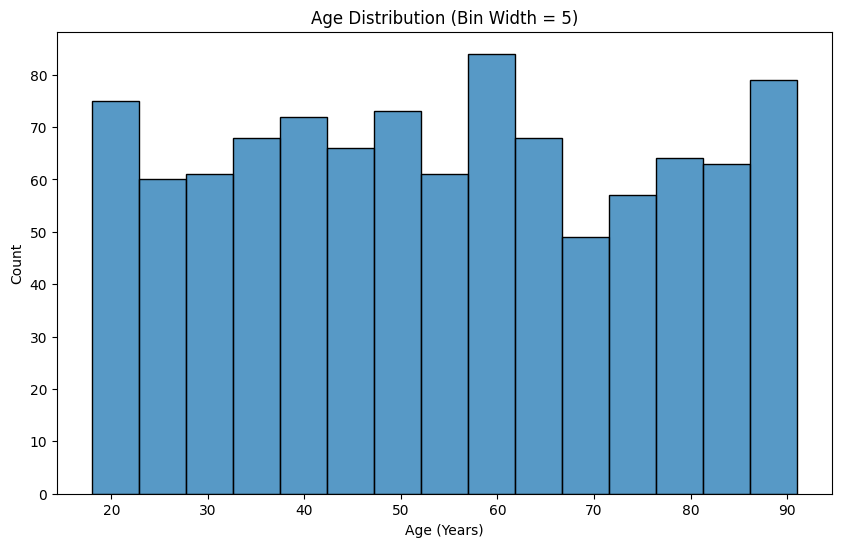

In [20]:
# a. Age with Bin Width of 5

# Calculating the number of bins required for a bin width of 5 and plot the age distribution

# Calculate number of bins for age (bin width = 5)

age_range = df['Age (Years)'].max() - df['Age (Years)'].min()
bins = int(age_range / 5) + 1

plt.figure(figsize=(10, 6))
sns.histplot(df['Age (Years)'], bins=bins)
plt.title('Age Distribution (Bin Width = 5)')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

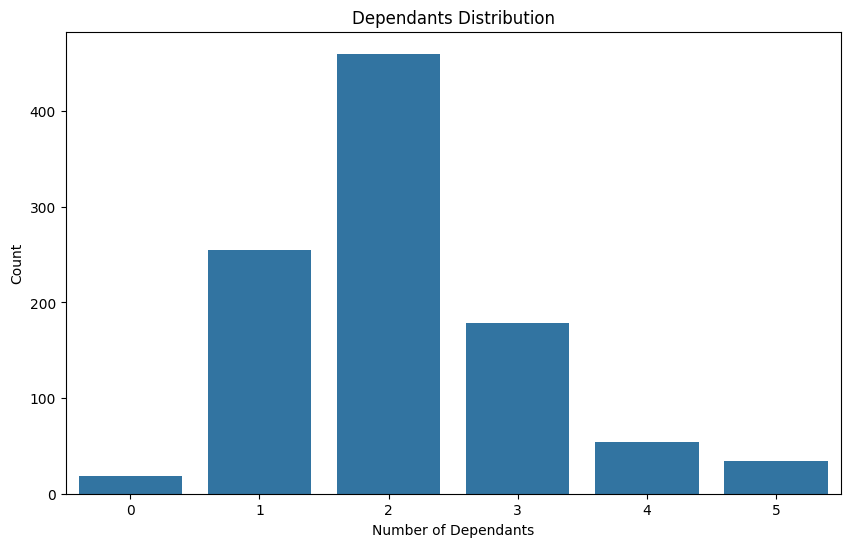

In [22]:
# b. Dependants, Fixing Data Errors

# Handling invalid dependants entries in Seaborn by converting them to 0.

# Fix dependants data in DataFrame

df['Dependants'] = pd.to_numeric(df['Dependants'], errors='coerce').fillna(0).astype(int)

plt.figure(figsize=(10, 6))
sns.countplot(x='Dependants', data=df)
plt.title('Dependants Distribution')
plt.xlabel('Number of Dependants')
plt.ylabel('Count')
plt.show()


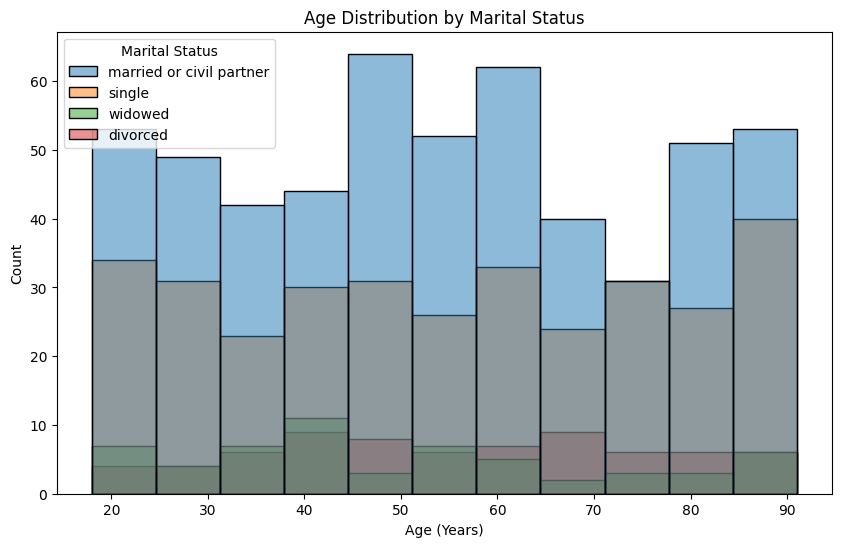

In [24]:
# c. Age Conditioned on Marital Status

# Plotting the age distribution with default bins, conditioned on marital status.

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age (Years)', hue='Marital Status')
plt.title('Age Distribution by Marital Status')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

### Task 3: Multivariate Plots


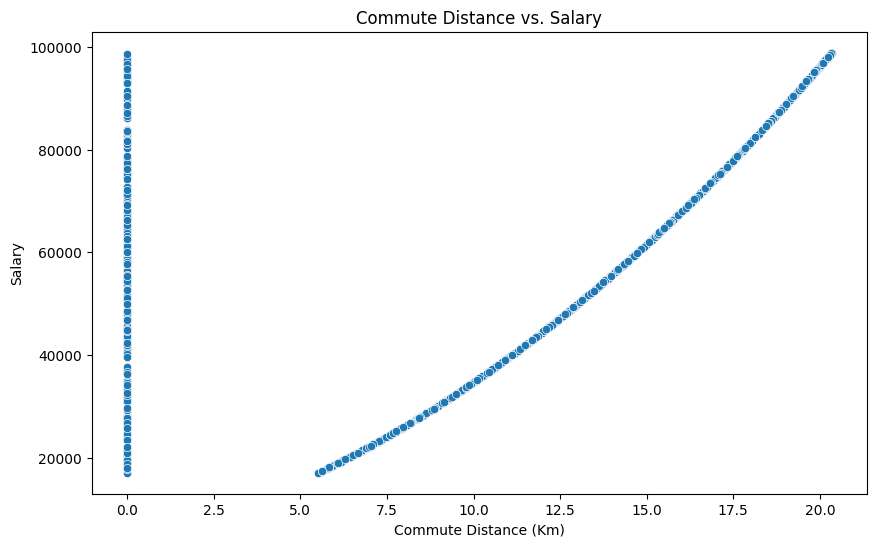

In [31]:
# a. Commuted Distance vs. Salary

# Plotting a scatterplot of commute distance against salary.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance Commuted to Work (Km)', y='Yearly Salary (Dollar)', data=df)
plt.title('Commute Distance vs. Salary')
plt.xlabel('Commute Distance (Km)')
plt.ylabel('Salary')
plt.show()

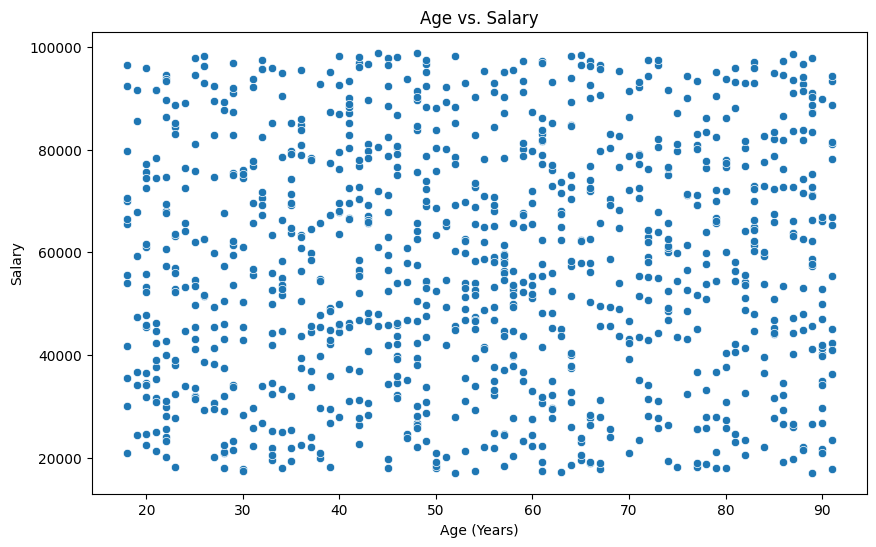

In [33]:
# b. Age vs. Salary

# We plot a scatterplot of age against salary.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age (Years)', y='Yearly Salary (Dollar)', data=df)
plt.title('Age vs. Salary')
plt.xlabel('Age (Years)')
plt.ylabel('Salary')
plt.show()

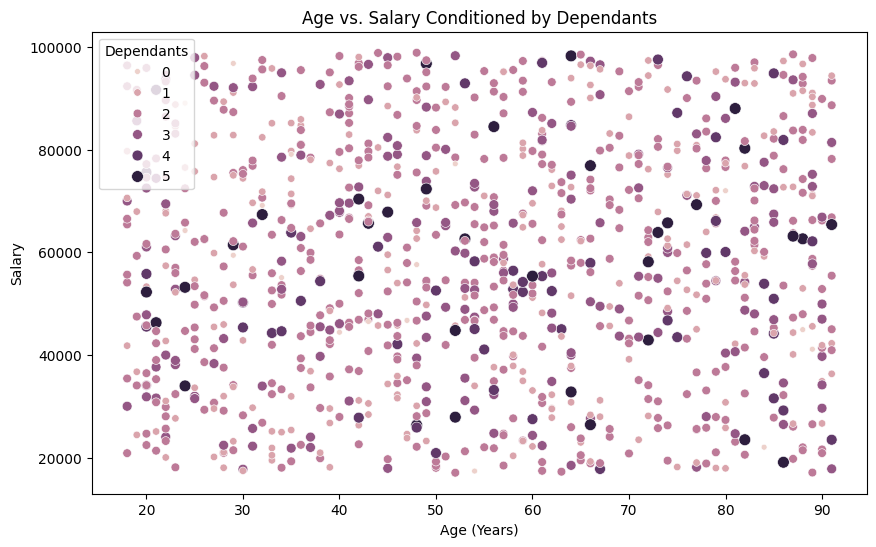

In [35]:
# c. Age vs. Salary Conditioned by Dependants

# We plot age against salary, colored by the number of dependants.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age (Years)', y='Yearly Salary (Dollar)', hue='Dependants', size='Dependants', data=df)
plt.title('Age vs. Salary Conditioned by Dependants')
plt.xlabel('Age (Years)')
plt.ylabel('Salary')
plt.show()

### Task 4: Save Visualizations

In [36]:
# Saving all generated plots to files for submission.

# Save all plots
def save_plots():
    """
    Saves all visualization plots to files.
    """
    # Age histogram (bin width = 5)
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age (Years)'], bins=bins)
    plt.title('Age Distribution (Bin Width = 5)')
    plt.xlabel('Age (Years)')
    plt.ylabel('Count')
    plt.savefig('age_histogram.png')
    plt.close()
    
    # Dependants countplot
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Dependants', data=df)
    plt.title('Dependants Distribution')
    plt.xlabel('Number of Dependants')
    plt.ylabel('Count')
    plt.savefig('dependants_countplot.png')
    plt.close()
    
    # Age by marital status
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Age (Years)', hue='Marital Status')
    plt.title('Age Distribution by Marital Status')
    plt.xlabel('Age (Years)')
    plt.ylabel('Count')
    plt.savefig('age_by_marital_status.png')
    plt.close()
    
    # Commute vs. Salary
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Distance Commuted to Work (Km)', y='Yearly Salary (Dollar)', data=df)
    plt.title('Commute Distance vs. Salary')
    plt.xlabel('Commute Distance (Km)')
    plt.ylabel('Salary')
    plt.savefig('commute_vs_salary.png')
    plt.close()
    
    # Age vs. Salary
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age (Years)', y='Yearly Salary (Dollar)', data=df)
    plt.title('Age vs. Salary')
    plt.xlabel('Age (Years)')
    plt.ylabel('Salary')
    plt.savefig('age_vs_salary.png')
    plt.close()
    
    # Age vs. Salary by Dependants
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age (Years)', y='Yearly Salary (Dollar)', hue='Dependants', size='Dependants', data=df)
    plt.title('Age vs. Salary Conditioned by Dependants')
    plt.xlabel('Age (Years)')
    plt.ylabel('Salary')
    plt.savefig('age_vs_salary_by_dependants.png')
    plt.close()

# Execute save_plots
save_plots()
print("All plots saved successfully.")

All plots saved successfully.
